## 探索 DuEE 数据集

In [6]:
import os
import pdb
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\kobe\.conda\envs\forltp\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
data_path = 'data/train.json'
def date_reader():
    with open(data_path, mode='r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            sample = json.loads(line.strip())
            yield sample


In [2]:
data_path = 'data/train.json'
duplicates, diversities = 0, 0
sample_num = 0
with open(data_path, mode='r', encoding='utf-8') as f:
    for i, line in enumerate(f):
        sentence = json.loads(line.strip())
        event_list = sentence['event_list']
        event_types = set()
        for event in event_list:
            event_t = event['event_type']
            if event_t in event_types:
                duplicates += 1
                #pdb.set_trace()
            else:
                event_types.add(event_t)
                diversities += 1
                #pdb.set_trace()
        sample_num += 1

print(duplicates, diversities, sample_num)
print(duplicates / sample_num, diversities / sample_num)
print(f'event avg num: {(duplicates+diversities) / sample_num}')

754 13161 11958
0.06305402241177455 1.1006021073758154
event avg num: 1.1636561297875898


### 每个样本包含的触发词数量

In [8]:
trigger_num_list = []

for i, sample in enumerate(date_reader()):
    text = sample['text']
    event_list = sample['event_list']
    trigger_num_list.append(len(event_list))

print(len(trigger_num_list), max(trigger_num_list), min(trigger_num_list), sum(trigger_num_list)/len(trigger_num_list))
trigger_num_array = np.array(trigger_num_list)
more_than_one = (trigger_num_array > 1).sum()
print(more_than_one, more_than_one/len(trigger_num_list))

11958 15 1 1.1636561297875898
1558 0.13028934604448905


### 事件类型的共现情况

In [ ]:
from utils import load_dict

event_dict = load_dict('data/event_tag.dict')
num_event_type = len(event_dict) - 1
co_matrix = np.zeros((num_event_type, num_event_type))
for i, sample in enumerate(date_reader()):
    text = sample['text']
    event_list = sample['event_list']
    event_type_ids = []
    for event in event_list:
        event_t = event['event_type']
        event_type_ids.append(event_dict.get(event_t))
    if len(event_type_ids) < 2: continue
    event_type_ids = list(set(event_type_ids))

    for j in range(len(event_type_ids)-1):
        event_j = event_type_ids[j]
        for k in range(j+1, len(event_type_ids)):
            event_k = event_type_ids[k]

            if event_j <= event_k:
                co_matrix[event_k][event_j] += 1
            else:
                co_matrix[event_j][event_k] += 1
print(co_matrix)

In [26]:
ind = np.unravel_index(np.argsort(-co_matrix, axis=None), co_matrix.shape)
row_indices, col_indices = ind
idx_to_event_type = {idx: event_type for event_type, idx in event_dict.items()}
for i, j in zip(row_indices[:10], col_indices[:10]):

    print(f'{idx_to_event_type[i]} + {idx_to_event_type[j]}: {co_matrix[i][j]}')

竞赛行为-胜负 + 竞赛行为-晋级: 184.0
竞赛行为-胜负 + 竞赛行为-夺冠: 109.0
灾害/意外-车祸 + 人生-死亡: 74.0
司法行为-入狱 + 司法行为-罚款: 45.0
灾害/意外-袭击 + 人生-死亡: 34.0
人生-死亡 + 人生-失联: 33.0
竞赛行为-退赛 + 竞赛行为-胜负: 26.0
人生-结婚 + 人生-产子/女: 25.0
灾害/意外-坍/垮塌 + 人生-死亡: 22.0
人生-离婚 + 人生-结婚: 20.0


### 触发词字数的分布，最大值、平均值、最小值

13915 26 1 2.0741645706072585


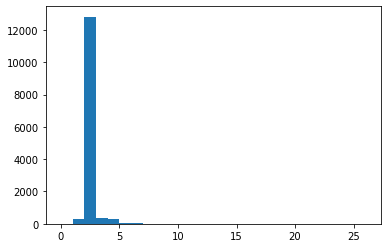

In [35]:
char_num_list = []
for i, sample in enumerate(date_reader()):
    text = sample['text']
    event_list = sample['event_list']
    for event in event_list:
        trigger = event['trigger']
        char_num_list.append(len(trigger))

print(len(char_num_list), max(char_num_list), min(char_num_list), sum(char_num_list)/len(char_num_list))

plt.hist(char_num_list, bins=[0,1,2,3,4,5,6,7,8,10,26])
plt.show()

### 样本字数的分布，最大值、平均值、最小值

11958 378 6 56.960863020572


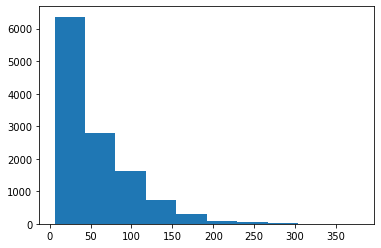

In [33]:
char_num_list = []
for i, sample in enumerate(date_reader()):
    text = sample['text']
    
    char_num_list.append(len(text))

print(len(char_num_list), max(char_num_list), min(char_num_list), sum(char_num_list)/len(char_num_list))

plt.hist(char_num_list)
plt.show()